In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [222]:
dados = pd.read_csv("dadosacoes.csv")

In [223]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


<Axes: xlabel='nome ação', ylabel='valor de mercado R$ -(Bilhões)'>

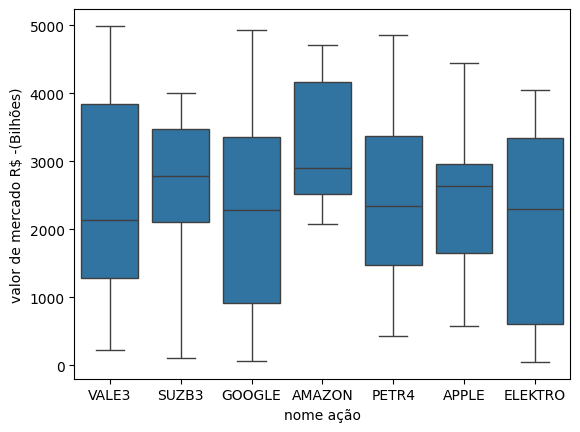

In [224]:
sns.boxplot(y='valor de mercado R$ -(Bilhões)',x='nome ação',data=dados)

In [225]:
dados.info()#verificando se tem numeros invalidos ou nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [226]:
dados.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [227]:
dados.info()# verificando se tem dados invalido
#Renomeando o nome da coluna
colunas={'nome ação':'Simbolo'}
dados.rename(columns=colunas,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [228]:
#teste para ver se funcionou o renomeio das colunas
dados.head()

,Simbolo,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [229]:
#transformando o nome da ação em string ao inves de object
dados['Simbolo'] = dados['Simbolo'].astype(str)

In [230]:
dados_n = pd.get_dummies(dados,columns=['Simbolo'],drop_first=True)

In [241]:
#Aplicando o KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(dados_n)

KMeans()

In [242]:
#Verificando a qualidade da inertia 
sse = kmeans.inertia_
print('SSE',sse)

SSE 3041796.338217338


In [243]:
# Visualizando os agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [234]:
dados_n

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),Simbolo_APPLE,Simbolo_ELEKTRO,Simbolo_GOOGLE,Simbolo_PETR4,Simbolo_SUZB3,Simbolo_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,True
97,99,35,980,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,True


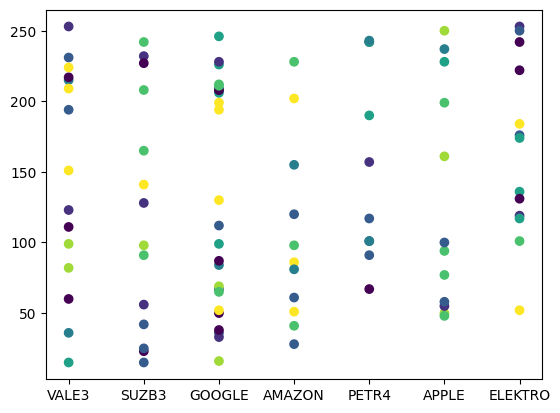

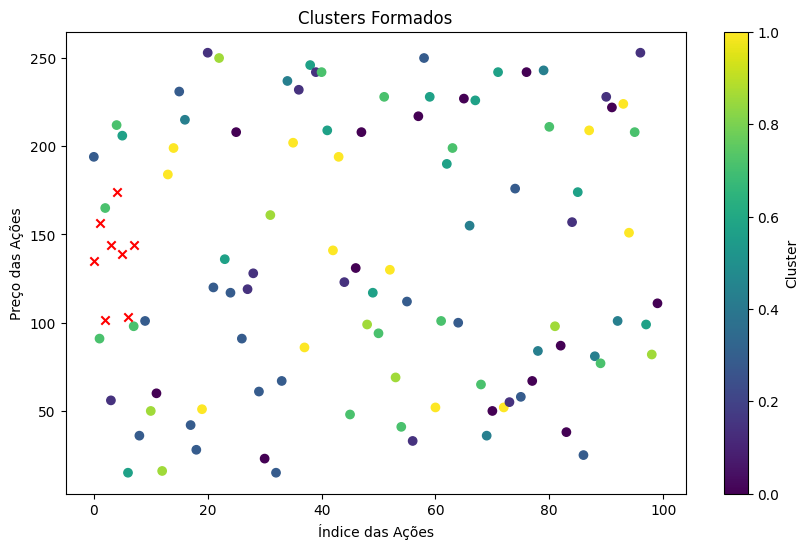

In [270]:
plt.scatter(dados['Simbolo'],dados['preço ação R$'],c=labels)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(dados)), dados['preço ação R$'], c=labels, cmap='viridis')
plt.scatter(range(len(centroids)), centroids[:, 0], marker='x', color='red')  # Centroids ajustados
plt.xlabel('Índice das Ações')
plt.ylabel('Preço das Ações')
plt.title('Clusters Formados')
plt.colorbar(label='Cluster')
plt.show()


In [251]:
df = pd.DataFrame(dados)

# Selecionar as colunas relevantes para o agrupamento
X = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

In [259]:
from sklearn.metrics import silhouette_score

In [285]:
def avaliacao(dados_normalizados):
    inercia = []
    silhueta = []

    for k in range(2, 9):  # Testar clusters de 2 a 4
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados_normalizados)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - {silhouette_score(dados_normalizados, kmeans.labels_)}')

    return silhueta, inercia


In [286]:
silhueta, inercia = avaliacao(dados_n)
for s in silhueta:
    print(s)


k=2 - 0.5603594246539042
k=3 - 0.6223500888313387
k=4 - 0.5271387677297121
k=5 - 0.5240249579589649
k=6 - 0.5599114287258435
k=7 - 0.4946336181974458
k=8 - 0.4669007297037227


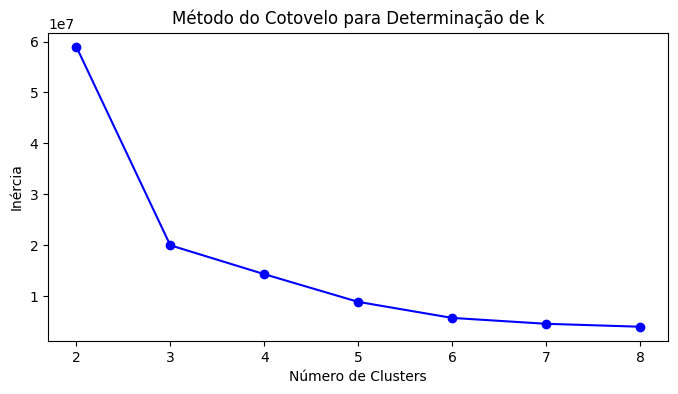

In [288]:
def plot_cotovelo(inercia):
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, 9), inercia, 'bo-')  # Ajustar o range
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

plot_cotovelo(inercia)

In [289]:
# Grafico da silhueta dos agrupamentos 
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados_n):

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados_n)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_n, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_n, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
        
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

Valor médio para 8 clusters: 0.467


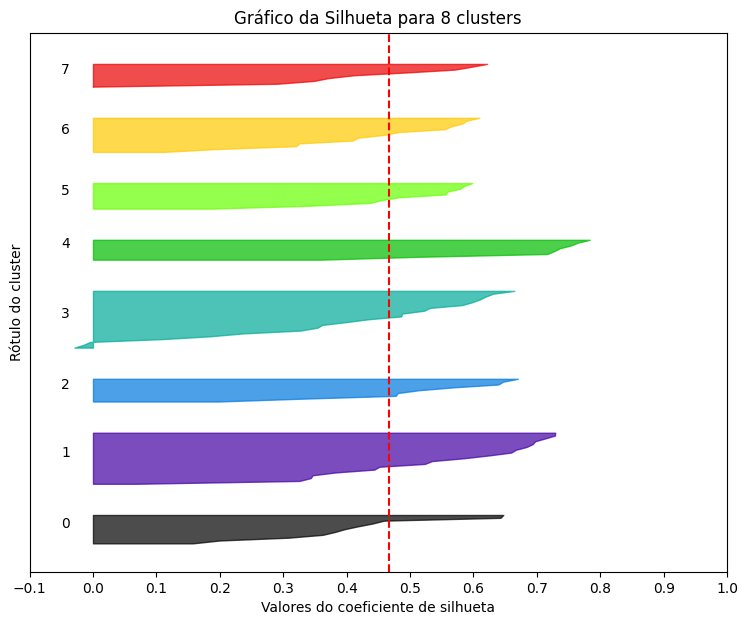

In [291]:
graf_silhueta(8,dados_n)

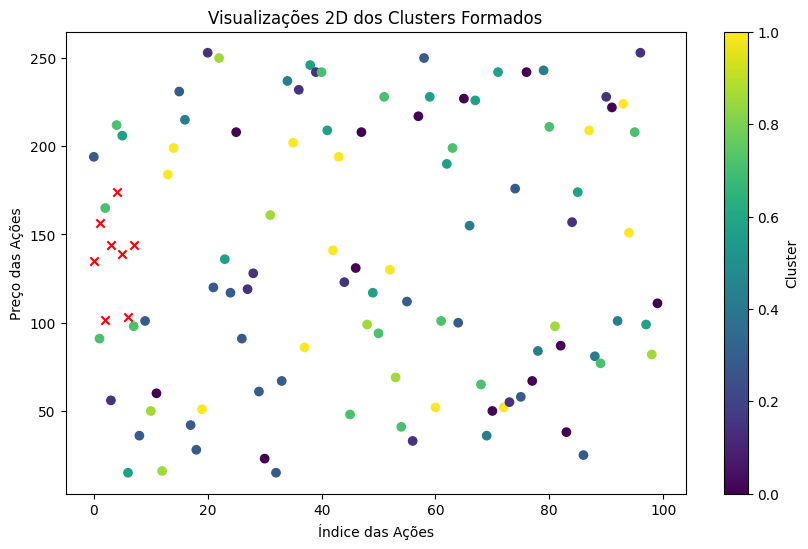

In [295]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dados)), dados['preço ação R$'], c=labels, cmap='viridis')
plt.scatter(range(len(centroids)), centroids[:, 0], marker='x', color='red')  # Centroids ajustados
plt.xlabel('Índice das Ações')
plt.ylabel('Preço das Ações')
plt.title('Visualizações 2D dos Clusters Formados')
plt.colorbar(label='Cluster')
plt.show()

In [297]:
from mpl_toolkits.mplot3d import Axes3D

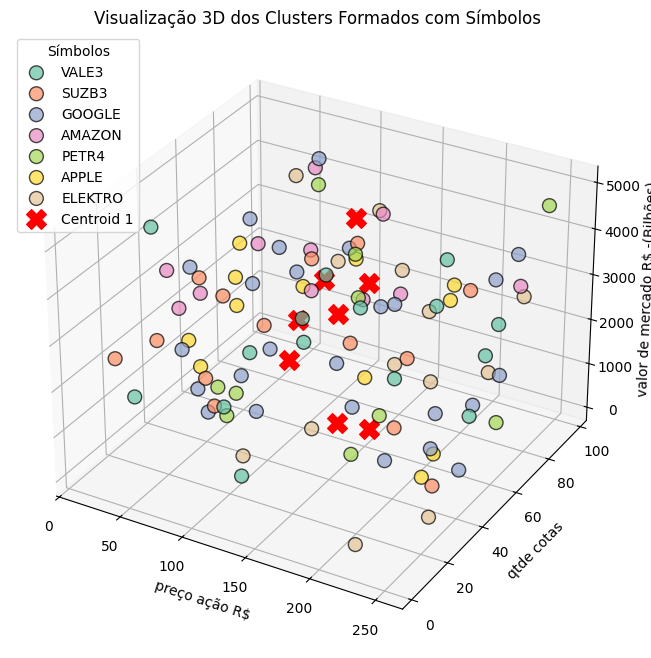

In [299]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.colors as mcolors

# Selecionando as colunas para visualização 3D
x_col = 'preço ação R$'
y_col = 'qtde cotas'
z_col = 'valor de mercado R$ -(Bilhões)'

# Criando o DataFrame com a coluna de clusters
dados_visualizacao_3d = dados.copy()
dados_visualizacao_3d['Cluster'] = labels  # Adiciona a coluna de clusters

# Criando um mapa de cores para os símbolos
simbolos = dados['Simbolo'].unique()
colors = sns.color_palette("Set2", len(simbolos))  # Usando uma paleta de cores do seaborn
symbol_color_map = {simbolo: color for simbolo, color in zip(simbolos, colors)}

# Plotando o gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos 3D com a cor baseada no símbolo
for simbolo in simbolos:
    subset = dados_visualizacao_3d[dados_visualizacao_3d['Simbolo'] == simbolo]
    ax.scatter(subset[x_col], subset[y_col], subset[z_col], 
               c=[symbol_color_map[simbolo]] * len(subset), 
               label=simbolo, s=100, alpha=0.7, edgecolor='k')

# Adicionando os centróides no gráfico 3D
for i, centroid in enumerate(centroids):
    ax.scatter(centroid[0], centroid[1], centroid[2], marker='X', color='red', s=200, label=f'Centroid {i+1}' if i == 0 else "")

# Adicionando rótulos aos eixos
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title('Visualização 3D dos Clusters Formados com Símbolos')

# Adicionando a legenda
plt.legend(title="Símbolos", loc='upper left')

# Exibindo o gráfico
plt.show()


Vantagens do Aprendizado Não Supervisionado

    -Menos Dependência de Dados Rotulados
    -Exploração de Padrões Desconhecidos
    -Aplicações em Dados Não Estruturados
    -Flexibilidade em Cenários de Pouca Informação